In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [ ]:
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['Annual Income (k$)'] = scaler.fit_transform(data[['Annual Income (k$)']])
data['Spending Score (1-100)'] = scaler.fit_transform(data[['Spending Score (1-100)']])
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959


# Annual Income vs Spending Score

In [ ]:
def dendogram(X, y):
    plt.Figure(figsize=(50,30))
    plt.title(y)
    dend = shc.dendrogram(shc.linkage(X,method="ward"))
    plt.axhline(150, c='r', linestyle='--')
    plt.legend()
    plt.tight_layout()
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6376\3794983236.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


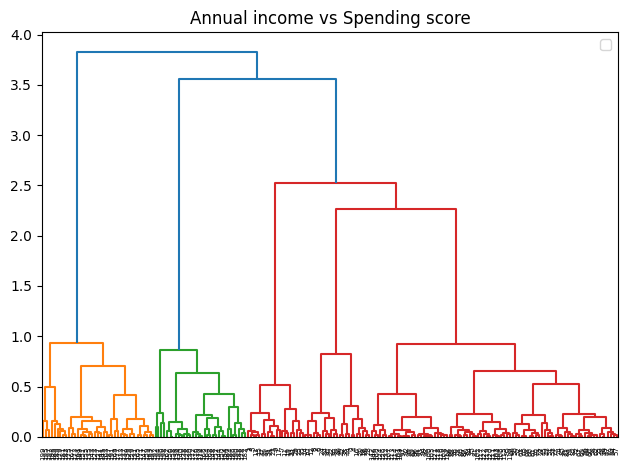

In [ ]:
dendogram(X = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values, y = "Annual income vs Spending score")

In [ ]:
def agglo(X, k, a, b):
    cluster = AgglomerativeClustering(n_clusters= k, linkage='ward')
    labels = cluster.fit_predict(X)
    plt.figure(figsize=(10,7))
    plt.scatter(a, b, c=cluster.labels_, cmap='rainbow')
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.tight_layout()
    plt.show()

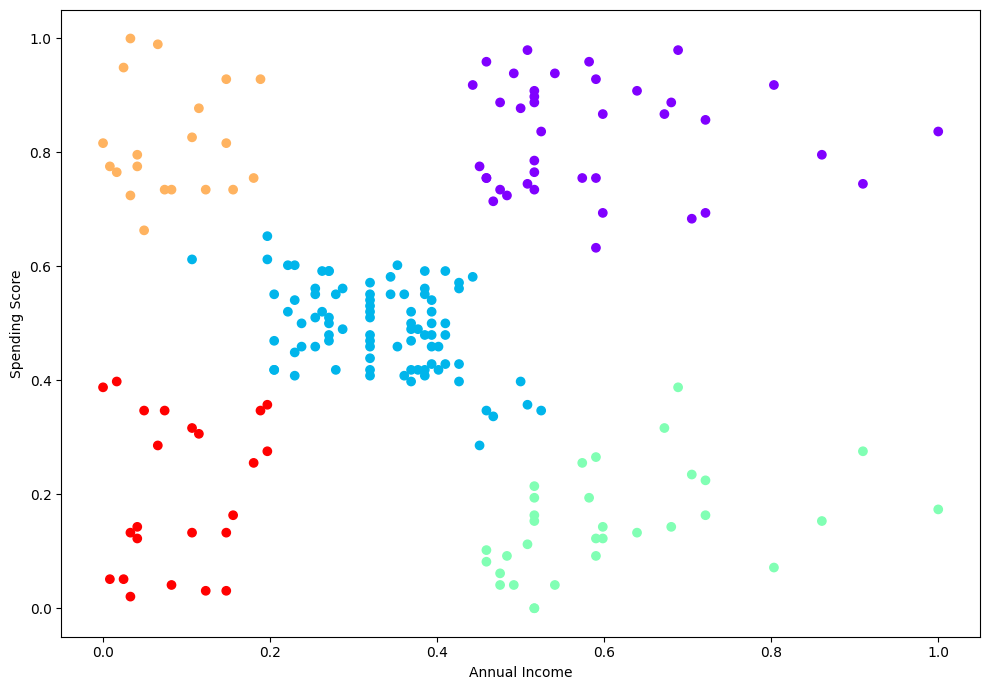

In [ ]:
agglo(X = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values, k = 5, a = data['Annual Income (k$)'], b = data['Spending Score (1-100)'])

# Age vs Annual Income

C:\Users\Admin\AppData\Local\Temp\ipykernel_6376\3794983236.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


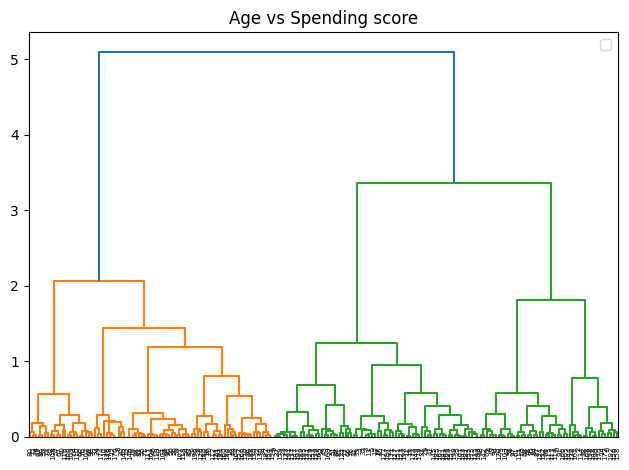

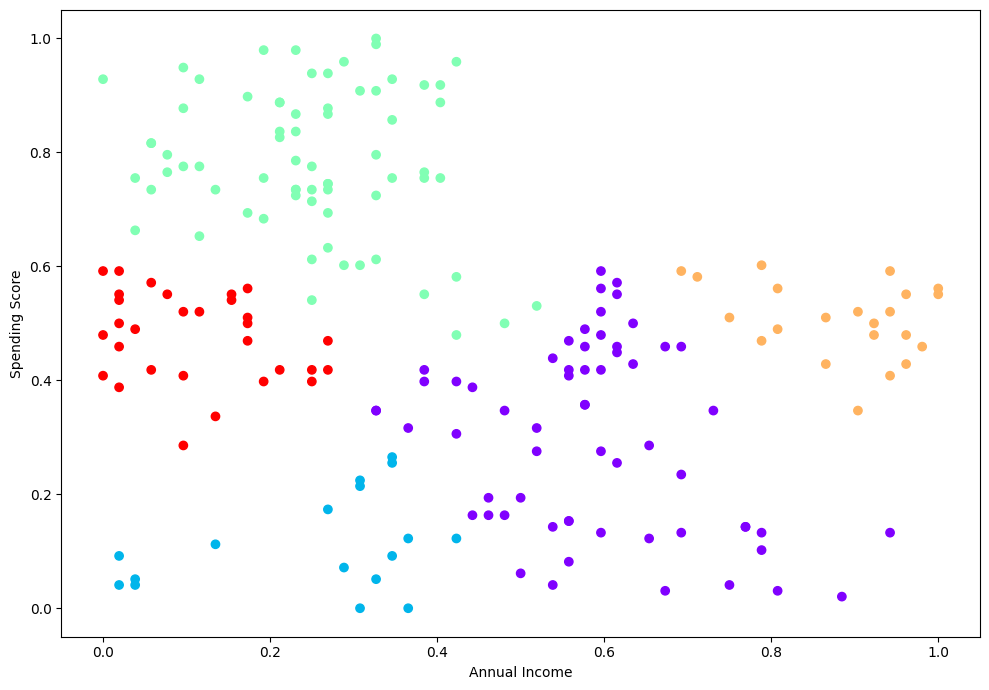

In [ ]:
dendogram(X = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values, y = "Age vs Spending score")
agglo(X = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values, k = 5, a = data['Age'], b = data['Spending Score (1-100)'])

# Age vs Annual Income 

C:\Users\Admin\AppData\Local\Temp\ipykernel_6376\3794983236.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


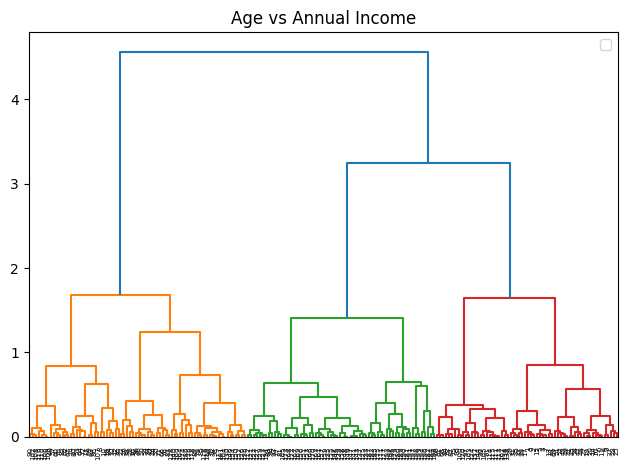

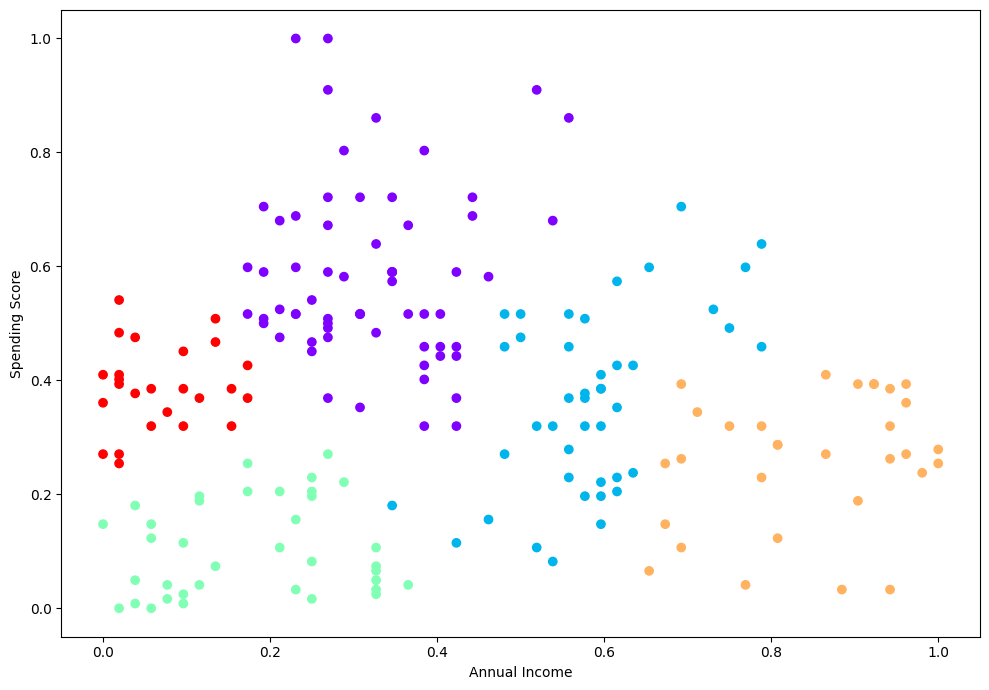

In [ ]:
dendogram(X = data[['Age' , 'Annual Income (k$)']].iloc[: , :].values, y = "Age vs Annual Income")
agglo(X = data[['Age' , 'Annual Income (k$)']].iloc[: , :].values, k = 5, a = data['Age'], b = data['Annual Income (k$)'])